In [ ]:
!pip install imbalanced-learn


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, classification_report


In [ ]:
df = pd.read_csv('Telco_Customer_Churn.csv')
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:

df.drop(['customerID'], axis=1, inplace=True)


df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)


df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


df = pd.get_dummies(df, drop_first=True)


In [ ]:
print("customerID column exists?", 'customerID' in df.columns)

print("TotalCharges type:", df['TotalCharges'].dtype)
print("Missing values in TotalCharges:", df['TotalCharges'].isnull().sum())

print("Total missing values in dataset:", df.isnull().sum().sum())

print("Unique values in Churn column:", df['Churn'].unique())

print("\nFirst 5 rows of dataframe:")
print(df.head())



customerID column exists? False
TotalCharges type: float64
Missing values in TotalCharges: 0
Total missing values in dataset: 0
Unique values in Churn column: [0 1]

First 5 rows of dataframe:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  Churn  gender_Male  \
0              0       1           29.85         29.85      0        False   
1              0      34           56.95       1889.50      0         True   
2              0       2           53.85        108.15      1         True   
3              0      45           42.30       1840.75      0         True   
4              0       2           70.70        151.65      1        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone

In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']


In [ ]:
print("Shape of X (features):", X.shape)
print("Shape of y (target):", y.shape)

print("\nFirst 5 rows of X:")
print(X.head())

print("\nFirst 10 values of y:")
print(y.head(10))

print("\nUnique values in y:", y.unique())


Shape of X (features): (7032, 30)
Shape of y (target): (7032,)

First 5 rows of X:
   SeniorCitizen  tenure  MonthlyCharges  TotalCharges  gender_Male  \
0              0       1           29.85         29.85        False   
1              0      34           56.95       1889.50         True   
2              0       2           53.85        108.15         True   
3              0      45           42.30       1840.75         True   
4              0       2           70.70        151.65        False   

   Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0         True           False             False   
1        False           False              True   
2        False           False              True   
3        False           False             False   
4        False           False              True   

   MultipleLines_No phone service  MultipleLines_Yes  ...  \
0                            True              False  ...   
1                           False              False  .

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [ ]:
print("Original shape:", X.shape)
print("Scaled shape:", X_scaled.shape)


Original shape: (7032, 30)
Scaled shape: (7032, 30)


In [ ]:

print("Mean of each column (should be ~0):")
print(np.mean(X_scaled, axis=0))

print("\nStandard deviation of each column (should be ~1):")
print(np.std(X_scaled, axis=0))


Mean of each column (should be ~0):
[ 2.62714891e-17 -1.12664271e-16  6.06265133e-17 -1.11906439e-16
 -7.67935835e-17  6.26473971e-17  6.46682808e-17  1.37420097e-16
 -7.27518159e-17  3.63759080e-17  1.97036168e-17 -4.29437802e-18
 -4.29437802e-18 -1.50303231e-17 -4.29437802e-18 -4.40805274e-17
 -4.29437802e-18  7.42674788e-17 -4.29437802e-18  2.72819310e-17
 -4.29437802e-18  8.48771186e-17 -4.29437802e-18  6.66891646e-17
  1.03317683e-16 -1.86931749e-17 -4.06702860e-17 -8.36140662e-17
  5.98686819e-17  4.39542221e-17]

Standard deviation of each column (should be ~1):
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


Before SMOTE:
Churn
0    5163
1    1869
Name: count, dtype: int64


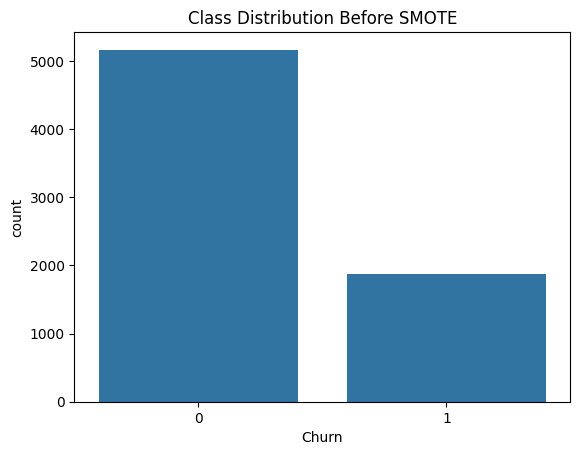

In [ ]:
print("Before SMOTE:")
print(y.value_counts())
sns.countplot(x=y)
plt.title("Class Distribution Before SMOTE")
plt.show()


In [ ]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

After SMOTE:
Churn
0    5163
1    5163
Name: count, dtype: int64


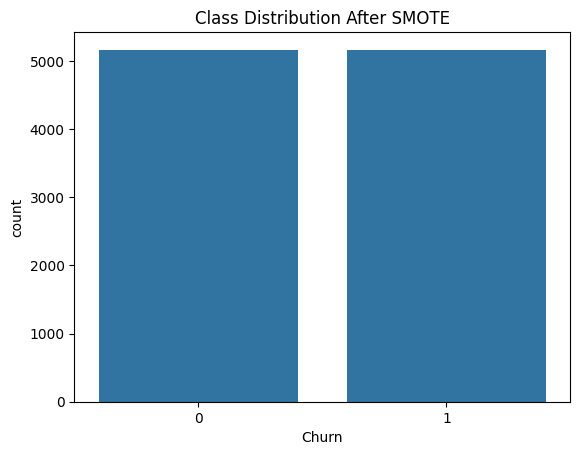

In [ ]:
print("After SMOTE:")
print(pd.Series(y_resampled).value_counts())
sns.countplot(x=y_resampled)
plt.title("Class Distribution After SMOTE")
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (8260, 30)
X_test shape: (2066, 30)
y_train shape: (8260,)
y_test shape: (2066,)


In [ ]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("🔹 Logistic Regression Report:\n")
print(confusion_matrix(y_test, lr_pred))
print(classification_report(y_test, lr_pred))

🔹 Logistic Regression Report:

[[778 259]
 [176 853]]
              precision    recall  f1-score   support

           0       0.82      0.75      0.78      1037
           1       0.77      0.83      0.80      1029

    accuracy                           0.79      2066
   macro avg       0.79      0.79      0.79      2066
weighted avg       0.79      0.79      0.79      2066



In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

print("🔹 Decision Tree Report:\n")
print(confusion_matrix(y_test, dt_pred))
print(classification_report(y_test, dt_pred))


🔹 Decision Tree Report:

[[813 224]
 [221 808]]
              precision    recall  f1-score   support

           0       0.79      0.78      0.79      1037
           1       0.78      0.79      0.78      1029

    accuracy                           0.78      2066
   macro avg       0.78      0.78      0.78      2066
weighted avg       0.78      0.78      0.78      2066



In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)
mlp.fit(X_train, y_train)
mlp_pred = mlp.predict(X_test)

print("🔹 Neural Network Report:\n")
print(confusion_matrix(y_test, mlp_pred))
print(classification_report(y_test, mlp_pred))


🔹 Neural Network Report:

[[815 222]
 [142 887]]
              precision    recall  f1-score   support

           0       0.85      0.79      0.82      1037
           1       0.80      0.86      0.83      1029

    accuracy                           0.82      2066
   macro avg       0.83      0.82      0.82      2066
weighted avg       0.83      0.82      0.82      2066



/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion(model_name, y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f"{model_name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()


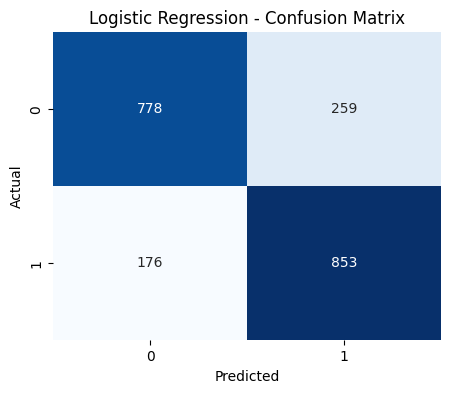

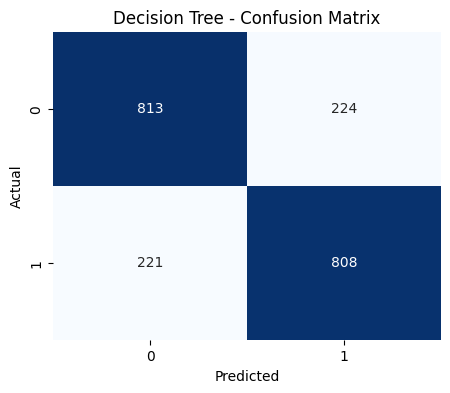

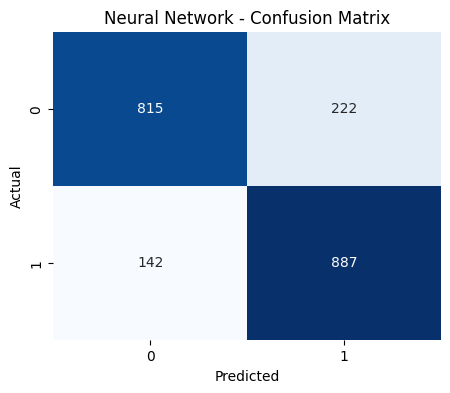

In [ ]:
plot_confusion("Logistic Regression", y_test, lr_pred)
plot_confusion("Decision Tree", y_test, dt_pred)
plot_confusion("Neural Network", y_test, mlp_pred)


<ipython-input-30-84ae9695587d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette="viridis")


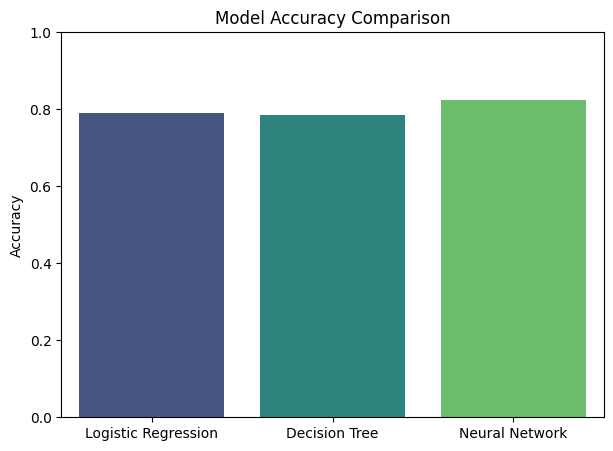

In [ ]:
from sklearn.metrics import accuracy_score

models = ['Logistic Regression', 'Decision Tree', 'Neural Network']
accuracies = [
    accuracy_score(y_test, lr_pred),
    accuracy_score(y_test, dt_pred),
    accuracy_score(y_test, mlp_pred)
]

plt.figure(figsize=(7, 5))
sns.barplot(x=models, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.show()


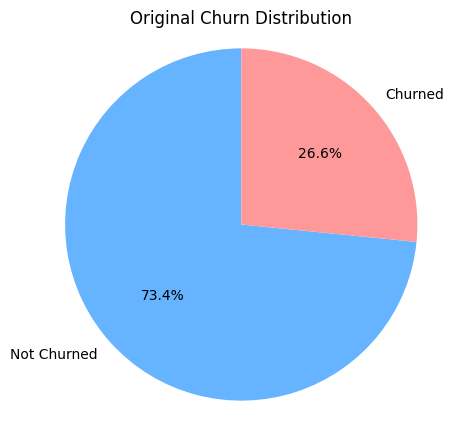

In [ ]:
labels = ['Not Churned', 'Churned']
sizes = y.value_counts()

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title("Original Churn Distribution")
plt.axis('equal')
plt.show()
